## 5.1 Apply Keras/TensorFlow neural network  
Use tensorflow to train the model with 1600/180K training records, compile the model, and classify 400/20K test records and calcualte the accuracy accuracy.  
**Create the model**  
Build the keras model by stacking layers into the network. Our model here has four layers:
- Flatten reshapes the data into a 1-dimensional array
- [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) tells the model to use output arrays of shape (*, 512) and sets rectified linear [activation function](https://keras.io/activations/). 
- [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) applies dropout to the input to help avoid overfitting.
- The next Dense line condenses the ouput into probabilities for each of the 2 Energy Loss Classes.

**Compile the model**   
- [Adam](https://keras.io/optimizers/) is an optimization algorithm that uses stochastic gradient descent to update network weights.
- Sparse categorical crossentropy is a [loss function](https://keras.io/losses/) that is required to compile the model. The loss function measures how accurate the model is during training. We want to minimize this function to steer the model in the right direction.
- A metric is a function that is used to judge the performance of your model. We're using accuracy of our predictions as compared to y_test as our metric.  
Lastly, we fit our training data into the model, with several training repetitions (epochs), then evaluate our test data. 

Our final result is about ?% accuracy in classifying 400/20K events in the test set. You can try tweaking this model with different settings to get a better score. An easy tweak is increasing the epochs, which improves accuracy at the expense of time. Follow the links to the Keras layer docs above and try different options for Dense output, activation functions, optimization algorithms and loss functions.

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `x_train` and `y_train` arrays, which are the images and labels.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `x_test` array. We verify that the predictions match the labels from the `y_test` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:
*Setting number of Epochs to 1000*

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 2)                 2050      
                                                                 
 dropout_5 (Dropout)         (None, 2)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 2,053
Trainable params: 2,053
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 1s 26ms/step - loss: 0.6896 - acc: 0.5938 - val_loss: 0.7204 - val_acc: 0.0000e+00
Epoch 2/10
21/21 [==========================

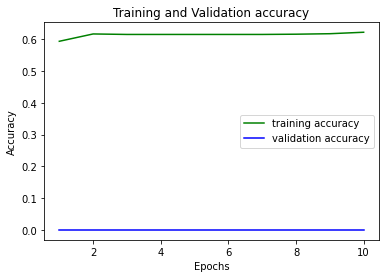

Elapsed 3.155 seconds.


In [ ]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')


# def buildAndCompileNNModel(image_frame_size,max_x):
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(image_frame_size, image_frame_size)),
#   tf.keras.layers.Dense(max_x+1, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.25),
#   tf.keras.layers.Dense(2, activation=tf.nn.softmax)
# ])
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(image_frame_size, image_frame_size)),
  tf.keras.layers.Dense(max_x+1, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
print(model.summary())

model.compile(optimizer=tf.optimizers.Adam(), 
              loss='binary_crossentropy',
              metrics=['acc'])
  # return model

  # model=buildAndCompileNNModel(image_frame_size,max_x)

start_time =time.perf_counter()
# y_train_unique_class_labels,y_train_positions = np.unique(y_train,return_inverse=True)
# y_train_positions
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
# , verbose=0, validation_split = 0.1,
#                     callbacks=[early_stop, PrintDot()]
# history =model.fit(x_train, y_train, epochs=1000)
# history =model.fit(x_train, y_train, epochs=10)

no_epoch=10
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=no_epoch,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val))

model.save('matter_vs_matterlbt_2k.h5')
acc_train = history.history['acc']
acc_val = history.history['val_acc']
print(acc_train)
print(acc_train)
epochs = range(1,no_epoch+1)
plt.plot(epochs,acc_train, 'g', label='training accuracy')
plt.plot(epochs, acc_val, 'b', label= 'validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

elapsed_time=time.perf_counter() - start_time
print('Elapsed %.3f seconds.' % elapsed_time)